# Titanic Dataset

### Author: Houston Asher-Laws

### November 2nd 2025

### analyze and prepare data for the Titanic Dataset 

In [1]:
# This is a Python cell
# All imports should be at the top of the notebook
# This cell will be executed when the notebook is loaded

# Import pandas for data manipulation and analysis (we might want to do more with it)
import pandas as pd 
# Import matplotlib for creating static visualizations
import matplotlib.pyplot as plt 
# Import seaborn for statistical data visualization (built on matplotlib)
import seaborn as sns   
# Import the California housing dataset from sklearn
from sklearn.datasets import fetch_california_housing

# Import train_test_split for splitting data into training and test sets
from sklearn.model_selection import train_test_split
# Import LinearRegression for building a linear regression model
from sklearn.linear_model import LinearRegression  
# Import performance metrics for model evaluation
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error


In [43]:
# Load Titanic dataset
titanic = sns.load_dataset('titanic')

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
print(titanic.head(10))

   survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0         0       3    male  22.0      1      0   7.2500        S   Third   
1         1       1  female  38.0      1      0  71.2833        C   First   
2         1       3  female  26.0      0      0   7.9250        S   Third   
3         1       1  female  35.0      1      0  53.1000        S   First   
4         0       3    male  35.0      0      0   8.0500        S   Third   
5         0       3    male   NaN      0      0   8.4583        Q   Third   
6         0       1    male  54.0      0      0  51.8625        S   First   
7         0       3    male   2.0      3      1  21.0750        S   Third   
8         1       3  female  27.0      0      2  11.1333        S   Third   
9         1       2  female  14.0      1      0  30.0708        C  Second   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes

In [6]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [44]:
print(titanic.describe())

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [8]:
print(titanic.corr(numeric_only=True))



            survived    pclass       age     sibsp     parch      fare  \
survived    1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307   
pclass     -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500   
age        -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067   
sibsp      -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651   
parch       0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225   
fare        0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000   
adult_male -0.557080  0.094035  0.280328 -0.253586 -0.349943 -0.182024   
alone      -0.203367  0.135207  0.198270 -0.584471 -0.583398 -0.271832   

            adult_male     alone  
survived     -0.557080 -0.203367  
pclass        0.094035  0.135207  
age           0.280328  0.198270  
sibsp        -0.253586 -0.584471  
parch        -0.349943 -0.583398  
fare         -0.182024 -0.271832  
adult_male    1.000000  0.404744  
alone         0.404744  1.000000  


Reflection 1:
1) How many data instances are there?
   891
2) How many features are there?
    15
3) What are the names?
   survived     
   pclass       
   sex        
   age      
   sibsp       
   parch        
   fare        
   embarked     
    class        
   who         
   adult_male   
   deck         
  embark_town    
   alive         
  alone    
4) Are there any missing values?
     Yes there age, emabarked, deck
5) Are there any non-numeric features?
      Yes sex, embarked, class, who, embark_town, alive, deck, adult_male and alone.
6) Are the data instances sorted on any of the attributes?
         No the columns are not sorted.
7) What are the units of age?
       Years
8) What are the minimum, median and max age?
     min is 0.42 median is 28 and the max is 80.
9)  What two different features have the highest correlation?
               survived and adult_male.
10) Are there any categorical features that might be useful for prediction?
             Yes they would be sex becasue females have a higher survial rate. pclass becasue it relects status. Emarked can indicate wealth. 


# Section 2. Data Exploration and Preparation

array([[<Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='fare', ylabel='age'>,
        <Axes: xlabel='pclass', ylabel='age'>],
       [<Axes: xlabel='age', ylabel='fare'>,
        <Axes: xlabel='fare', ylabel='fare'>,
        <Axes: xlabel='pclass', ylabel='fare'>],
       [<Axes: xlabel='age', ylabel='pclass'>,
        <Axes: xlabel='fare', ylabel='pclass'>,
        <Axes: xlabel='pclass', ylabel='pclass'>]], dtype=object)

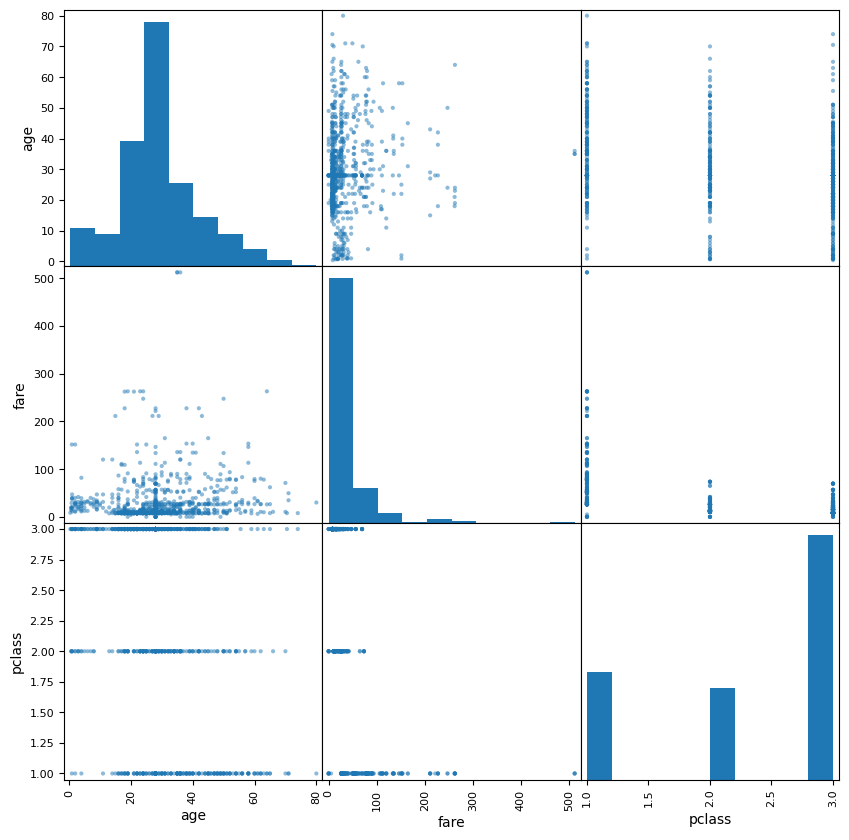

In [21]:
# all imports get moved to the top - import each only once
from pandas.plotting import scatter_matrix


attributes = ['age', 'fare', 'pclass']
scatter_matrix(titanic[attributes], figsize=(10, 10))

In [22]:
# all imports get moved to the top - import each only once
import matplotlib.pyplot as plt

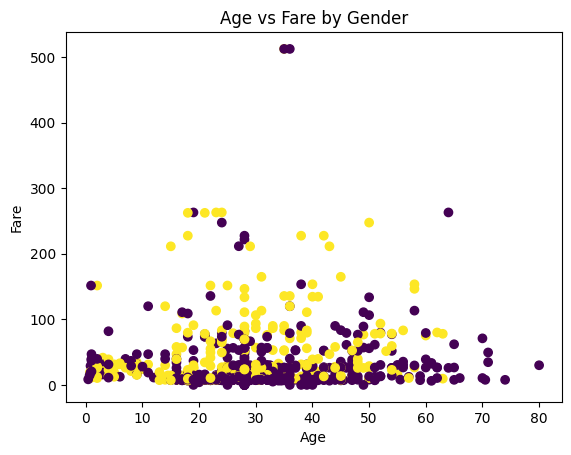

In [23]:
plt.scatter(titanic['age'], titanic['fare'], c=titanic['sex'].apply(lambda x: 0 if x == 'male' else 1))
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs Fare by Gender')
plt.show()

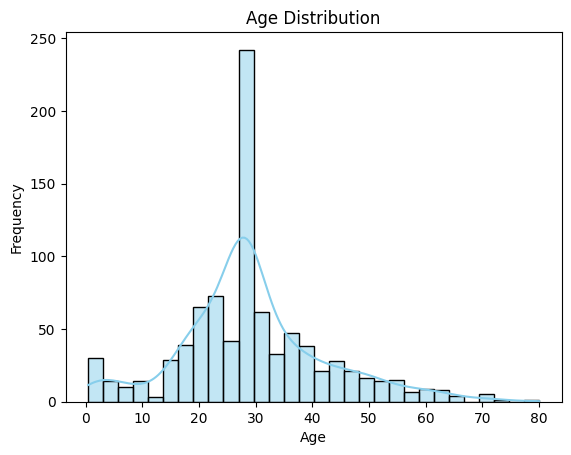

In [24]:
sns.histplot(titanic['age'], kde=True, bins=30, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

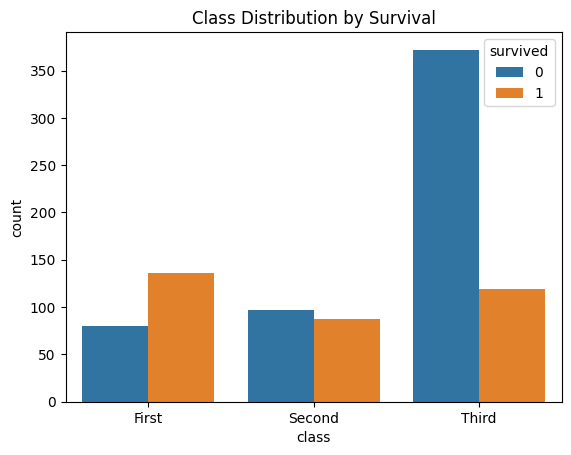

In [25]:
sns.countplot(x='class', hue='survived', data=titanic)
plt.title('Class Distribution by Survival')
plt.show()

## Reflection 2.1:


  **What patterns or anomalies do you notice?**

Most passengers were in there 20s and 30s. Most people in 3rd class did not survival.

**Do any features stand out as potential predictors?**

If you were in a higher class you had a higher chance that you were going to survival.

**Are there any visible class imbalances?**

I notice that there are more third class then first and second. 

## 2.2 Handle Missing Values and Clean Data

In [26]:
titanic['age'].fillna(titanic['age'].median(), inplace=True)

titanic['embark_town'].fillna(titanic['embark_town'].mode()[0], inplace=True)

C:\Users\houst\AppData\Local\Temp\ipykernel_37968\3499949714.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(), inplace=True)


## 2.3 Feature Engineering

In [28]:
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1

In [29]:
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic['embarked'] = titanic['embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [30]:
titanic['alone'] = titanic['alone'].astype(int)

In [31]:
titanic.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,family_size
0,0,3,0,22.0,1,0,7.2500,2.0,Third,man,True,NaN,Southampton,no,0,2
1,1,1,1,38.0,1,0,71.2833,0.0,First,woman,False,C,Cherbourg,yes,0,2
2,1,3,1,26.0,0,0,7.9250,2.0,Third,woman,False,NaN,Southampton,yes,1,1
3,1,1,1,35.0,1,0,53.1000,2.0,First,woman,False,C,Southampton,yes,0,2
4,0,3,0,35.0,0,0,8.0500,2.0,Third,man,True,NaN,Southampton,no,1,1


## Reflection 2.3

**Why might family size be a useful feature for predicting survival?**

It could show us if someone was travling with family if they had a higher chance at survial then somebody who is traving alone. 

**Why convert categorical data to numeric?**

So that the model can understand it and it makes it easier to interpert patterns in the data.

## Section 3. Feature Selection and Justification ##

### 3.1 Choose features and target

Input features: age, fare, pclass, sex, family_size

Target: survived

### 3.2 Define X and y

In [32]:
X = titanic[['age', 'fare', 'pclass', 'sex', 'family_size']]
y = titanic['survived']

## Reflection 3:

**Why are these features selected?**

Knowing these features determine your chances on survial. 

**Are there any features that are likely to be highly predictive of survival?**

Yes depending what pclass feature you are will determine your surivalitty. 


# Section 4. Splitting

### Basic Train/Test split 
 

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print('Train size:', len(X_train))
print('Test size:', len(X_test))


Train size: 712
Test size: 179


### Stratified Train/Test split
 

In [42]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

for train_indices, test_indices in splitter.split(X, y):
    X_train = X.iloc[train_indices]
    X_test = X.iloc[test_indices]
    y_train = y.iloc[train_indices]
    y_test = y.iloc[test_indices]

print('Train size:', len(X_train))
print('Test size:', len(X_test))
 

Train size: 712
Test size: 179


### Compare Results

In [41]:
print("Original Class Distribution:\n", y.value_counts(normalize=True))
print("Train Set Class Distribution:\n", y_train.value_counts(normalize=True))
print("Test Set Class Distribution:\n", y_test.value_counts(normalize=True))

 

Original Class Distribution:
 survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64
Train Set Class Distribution:
 survived
0    0.616573
1    0.383427
Name: proportion, dtype: float64
Test Set Class Distribution:
 survived
0    0.614525
1    0.385475
Name: proportion, dtype: float64


## Reflection 4:

**Why might stratification improve model performance?**

It keeps the same proportion of each class preventing a baised model.

**How close are the training and test distributions to the original dataset?**

They are pretty simiar but a little different. 

**Which split method produced better class balance?**

Train set Class Distribution because it uses stratification. 